In [1]:
# -------- BIBLIOTEKI -------- 

from bs4 import BeautifulSoup
from lxml import html

from IPython.display import Markdown as md
import mercury as mr

import requests
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import mean_squared_error, r2_score


#Zmienienie formatu zapisu danych numerycznych na dwie cyfry po przecinku.
pd.options.display.float_format = '{:.2f}'.format

#Wczytanie danych
df = pd.read_csv('insurance.csv')

In [2]:
app = mr.App(title="Prezentacja Projekt ML", description="Interaktywna aplikacja do prognozy progu ubezpieczenia") 

mercury.App

<h1 style="text-align:center; 
          color:#263a57; 
          font-family:verdana;"> Jak kosztowne jest zdrowie? </h1>

<p style="text-align:center;
          color:#263a57;
          font-family:verdana;
          font-size:1.1em"> Przewidywanie progu ubezpieczenia <br> zdrowotnego. </p>

<p style="padding-top:50px; 
          padding-left:100px;
          font-family:verdana;
          text-align:left; 
          margin-bottom:0;"> Prezentują:</p>
          
<p style="padding-top:10px; 
          padding-left:125px;
          font-family:verdana;
          font-size:0.9em;
          text-align:left; 
          margin-top: 0;">Szymon Cyranowicz<br>Gabriela Piwar<br>Łukasz Sielicki </p>

<p style="text-align:right;
          font-family:verdana;
          font-size:0.9em;
          margin-top: 0;"> 15.10.2023 </p>

<h2 style="color:#263a57; 
           font-family:verdana;
           padding-bottom:50px;"> Cel Projektu </h2>
          
<p style = "font-family:verdana;
            font-size:1.2em;"> 
            Określenie kosztów ubezpieczenia zdrowotnego na podstawie wybranych parametrów osobowych. </p> 
            
<p style = "padding-bottom:50px; 
            font-family:verdana;
            font-size:1.2em;">Stworzenie aplikacji do pomocy w wyznaczeniu progu ubezpieczenia.</p>



<h2 style="color:#263a57; 
          font-family:verdana;"> Zbiór Danych </h2>

<p> Źródło: 
<a href="https://www.kaggle.com/datasets/mirichoi0218/insurance">Medical Cost Personal Datasets</a>
<br>
<br>
Zbiór danych pochodzi z ksiązki Bretta Lantza, która przedstawia mozliwości języka R w uczeniu maszynowym. W tabeli oprócz danych osobowych podane są również ponoszone koszty ubezpiecznia.
</p>


<style>
#div1 + table {
    color:#000000;
    float:left; width:99%; 
    border-collapse: collapse;
    font-family: Geneva, sans-serif;
}

#div1 + table tbody td:nth-child(5){
    font-size: 20px;  
    text-align: center;
}

#div1 + table thead tr {
    text-align: center;
    background-color: #bab8b8;
    color: #ffffff;
    border: 1px solid #fcfcfc;
}
#div1 + table tbody tr:nth-child(even) {
    background-color: #fcfcfc;
}
#div1 + table th:nth-child(1) {
  width: 10%;
}
#div1 + table th:nth-child(2) {
  width: 20%;
}
#div1 + table th:nth-child(3) {
  width: 20%;
}
#div1 + table th:nth-child(4) {
  width: 20%;
}
#div1 + table th:nth-child(5) {
  width: 20%;
}
#div1 + table th:nth-child(6) {
  width: 20%;
}
#div1 + table th:nth-child(7) {
  width: 20%;
}
#div1 + table th:nth-child(8) {
  width: 20%;
}
</style>

<div id="div1"> </div>

|    |  age  |    sex |   bmi  |children  |  smoker  |   region  |   charges |
|--:-|---:---|---:----|----:---|--------:-|-----:----|-----:-----|----------:|
|  0 |    19 | female | 27.9   |        0 | yes      | southwest |  16 884.9 |
|  1 |    18 | male   | 33.8   |        1 | no       | southeast |   1 725.6 |
|  2 |    28 | male   | 33.0   |        3 | no       | southeast |   4 449.5 |
|  3 |    33 | male   | 22.7   |        0 | no       | northwest |  21 984.5 |
|  4 |    32 | male   | 28.9   |        0 | no       | northwest |   3 866.9 |


<p style = "font-family:verdana;
font-size:1.2em;"> Jak działa ubezpieczenie w Ameryce? Od czego zależy?  </p> 

<h2 style="color:#263a57; 
           font-family:verdana;
           padding-bottom:50px;"> Pojęcia i definicje </h2>

<p  style= "font-family:verdana;
            padding-bottom:50px;
            font-size:1.2em;"> 
<br> W Ameryce istnieje duża liniowa współzależność pomiędzy kosztami ubezpieczania, a osobami palącymi. Pomimo braku korelacji pomiędzy BMI, a kosztami ubepieczenia można zauważyć zależność, że przy wysokim BMI koszty ubezpieczenia są bardzo wysokie. </p> 

<h2 style="color:#263a57; 
          font-family:verdana;"> Analiza danych </h2>
          
<p> Macierz Korelacji </p>

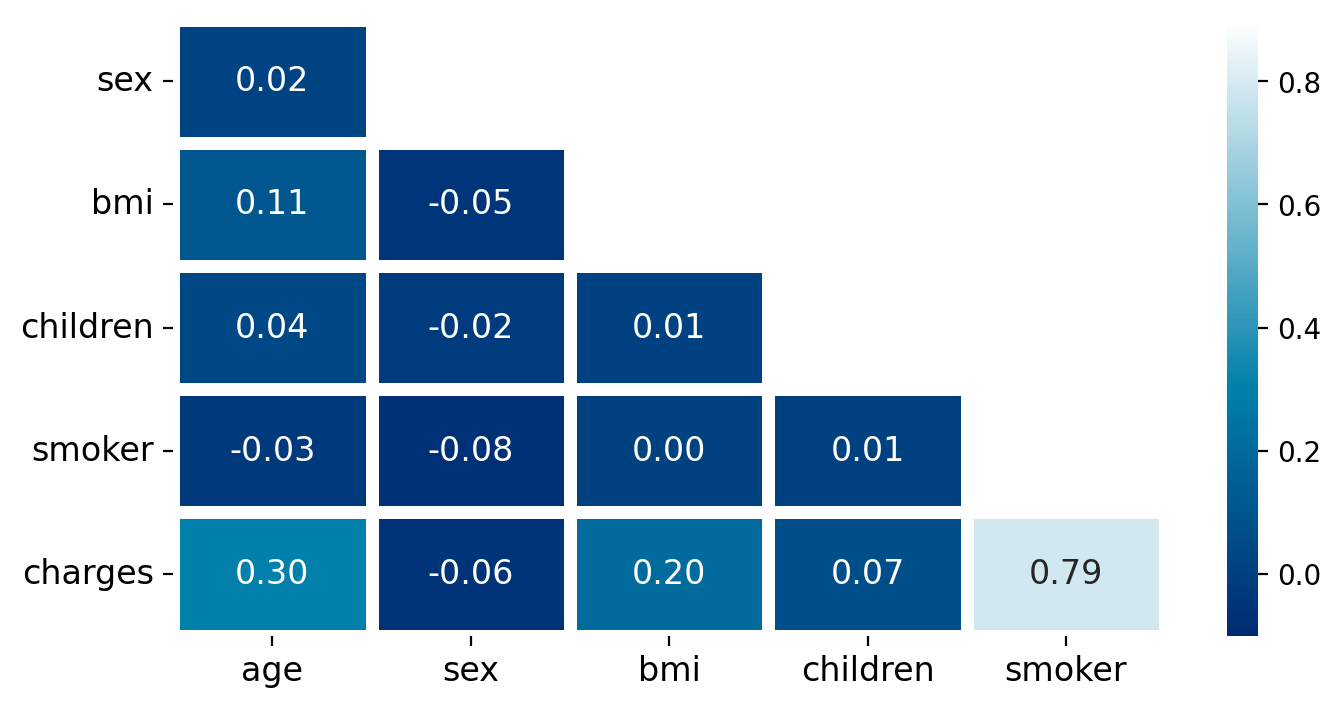

<h2 style="color:#263a57; 
          font-family:verdana;"> Analiza danych </h2>
          
<p> Zależność osób palących i niepalących od wypłacanego ubezpieczenia. </p>  

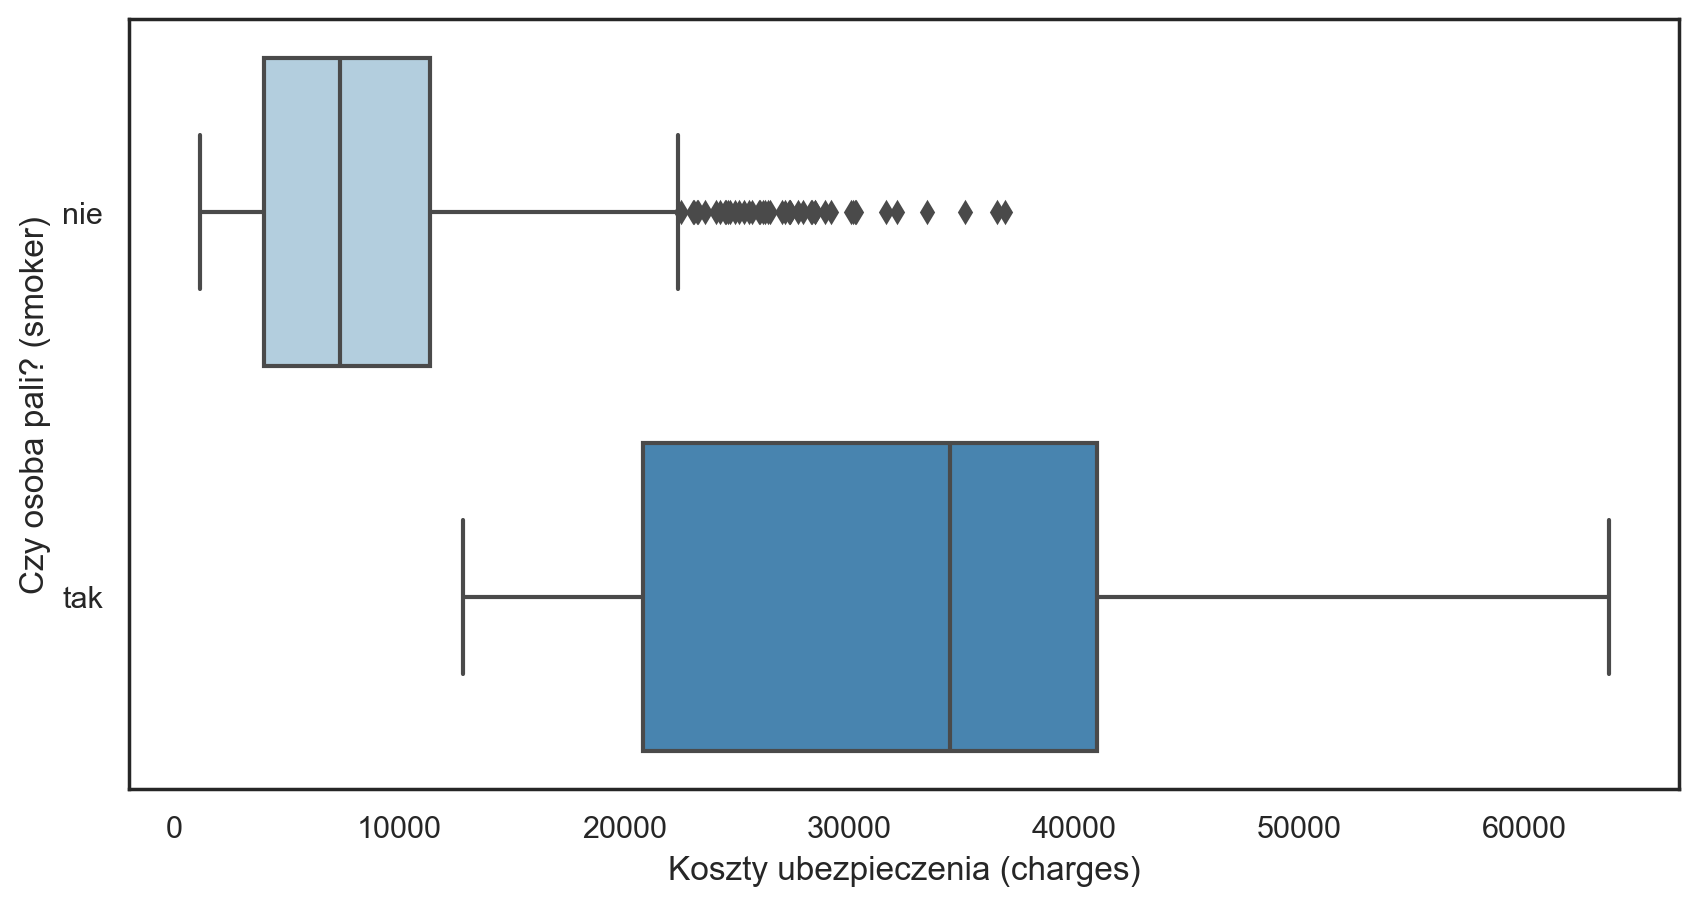

<h2 style="color:#263a57; 
          font-family:verdana;"> Analiza danych </h2>
          
<p> Zależność progu ubezpieczenia od BMI. </p>  

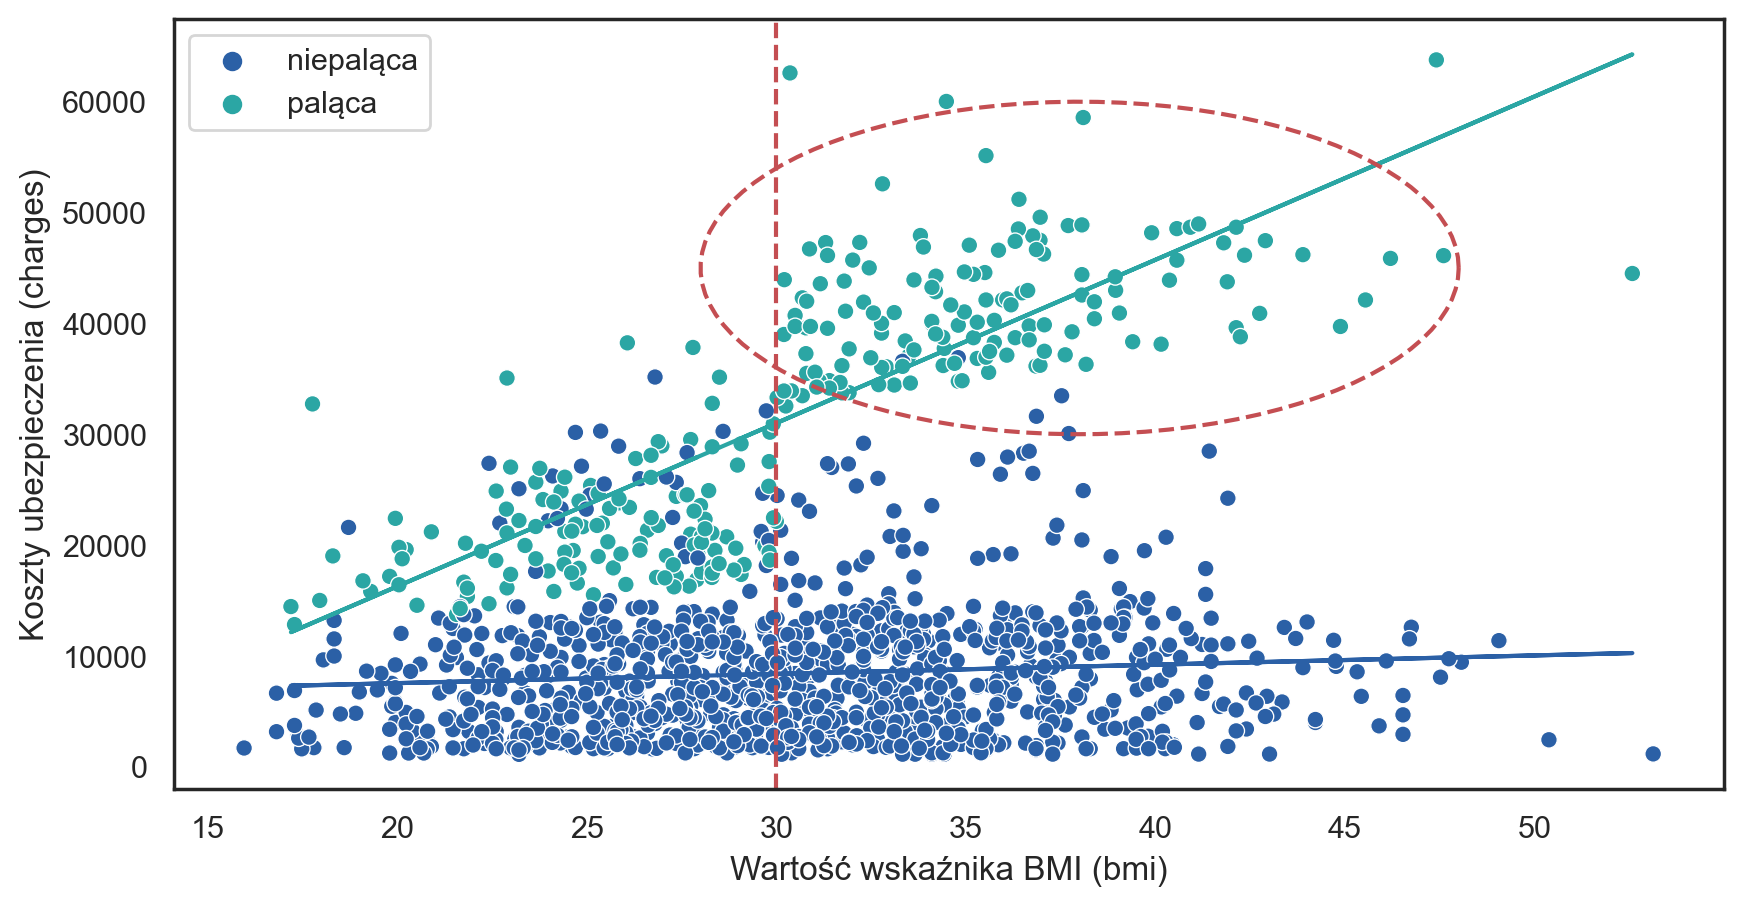

<h2 style="color:#263a57; 
          font-family:verdana;"> Analiza danych </h2>
          
<p> Zależność progu ubezbieczenia od wieku. </p> 

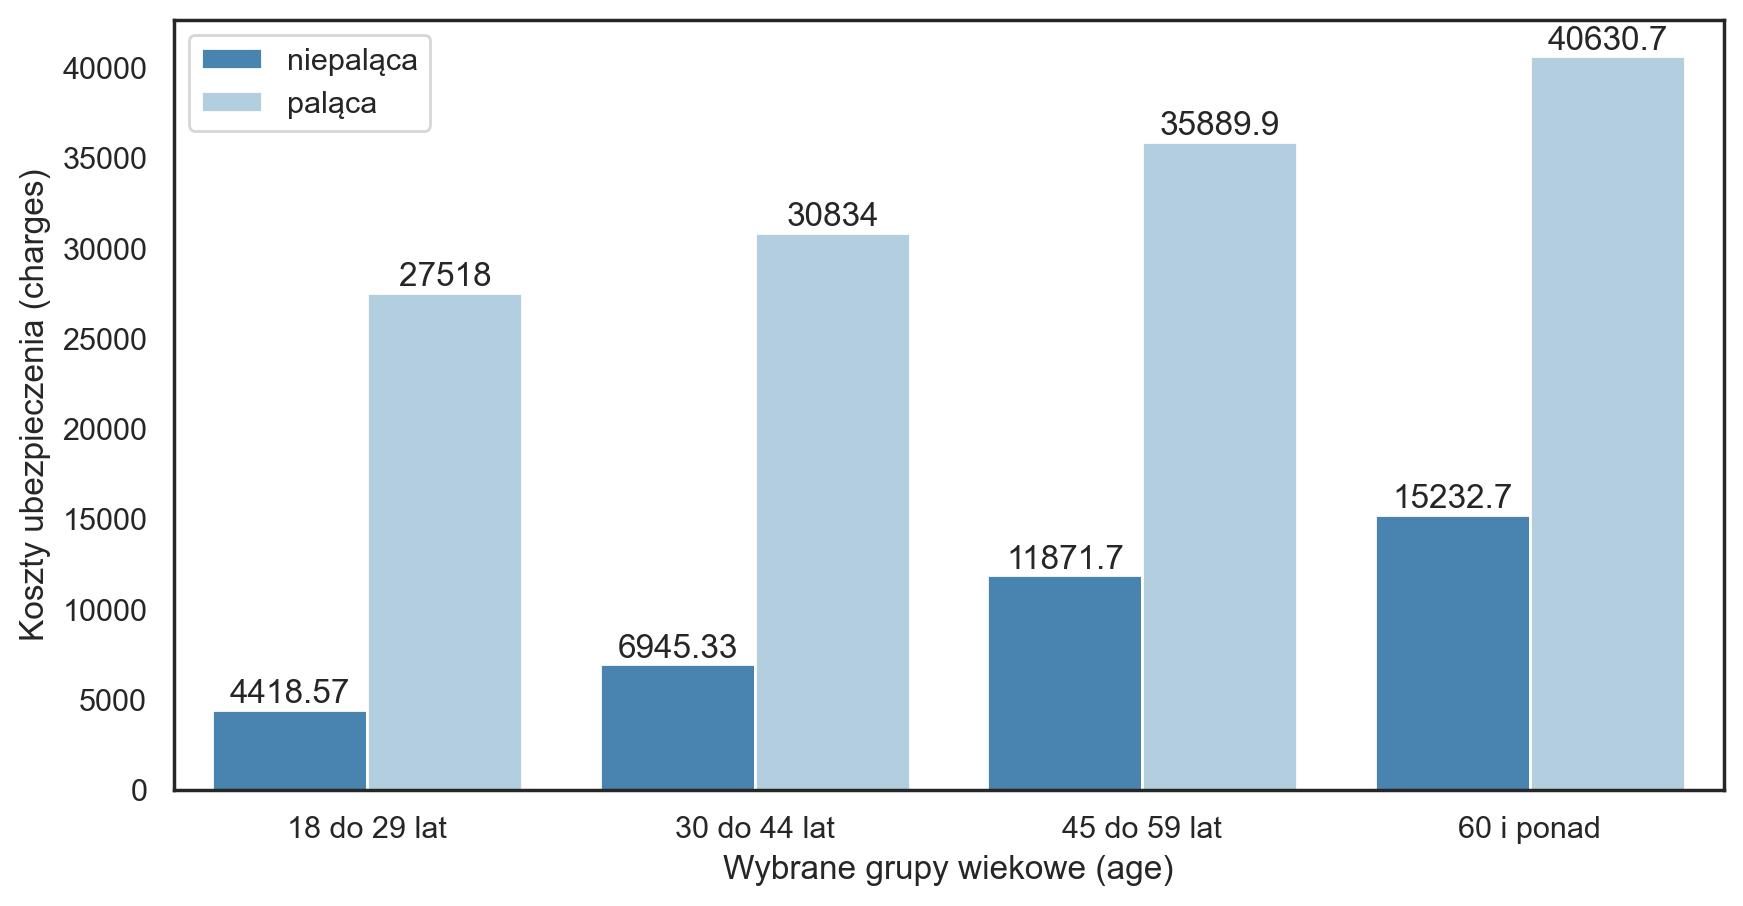

<h2 style="color:#263a57; 
          font-family:verdana;"> Regresja </h2>
          
<p style = "font-family:verdana;
            font-size:1.2em;"> 
            Model 1 - Regresja liniowa </p> 
            
<p style = "font-family:verdana;
            font-size:1.2em;"> Model 2 - Regresja polinominalna </p>   
            
<p style = "font-family:verdana;
            font-size:1.2em;"> Model 3 - Drzewa decyzyjne </p> 
            
<p style = "font-family:verdana;
            font-size:1.2em;"> Model 4 - Lasy losowe </p> 
            
<p style = "padding-bottom:50px; 
            font-family:verdana;
            font-size:1.2em;"> Model 5 - xgBoost</p> 

<h2 style="color:#263a57; 
          font-family:verdana;"> Regresja </h2>
          
<p> Porównanie zastosowanych modeli: </p>

<style>
#div1 + table {
    color:#000000;
    float:left; width:99%; 
    border-collapse: collapse;
    font-family: Geneva, sans-serif;
}

#div1 + table tbody td:nth-child(5){
    font-size: 20px;  
    text-align: center;
}

#div1 + table thead tr {
    text-align: center;
    background-color: #bab8b8;
    color: #ffffff;
    border: 1px solid #fcfcfc;
}
#div1 + table tbody tr:nth-child(even) {
    background-color: #fcfcfc;
}
#div1 + table th:nth-child(1) {
  width: 20%;
}
#div1 + table th:nth-child(2) {
  width: 35%;
}
#div1 + table th:nth-child(3) {
  width: 20%;
}
#div1 + table th:nth-child(4) {
  width: 20%;
}
#div1 + table th:nth-child(5) {
  width: 20%;
}
#div1 + table th:nth-child(6) {
  width: 20%;
}
#div1 + table th:nth-child(7) {
  width: 20%;
}

</style>

<div id="div1"> </div>

|                            | Parameters                                                                     |   Training Accuracy |   Testing Accuracy |   Training RMSE |   Testing RMSE |   5-Fold Score |
|:---------------------------|:-------------------------------------------------------------------------------|--------------------:|-------------------:|----------------:|---------------:|---------------:|
| Multiple Linear Regression | fit_intercept=False                                                            |            0.737336 |           0.799473 |         6169.68 |        5537.11 |       0.747835 |
| Polynomial Regression      | fit_intercept=False                                                            |            0.833028 |           0.895434 |         4919.08 |        3998.46 |       0.835794 |
| Decision Tree Regression   | max_depth=7                                                                    |            0.886818 |           0.863494 |         4049.97 |        4568.5  |       0.822452 |
| Random Forest Regression   | n_estimators=100, max_depth=7                                                  |            0.925169 |           0.897358 |         3293.09 |        3961.5  |       0.852046 |
| Xgboost Regression         | learning_rate = 0.5, gamma = 0.1, n_estimators=30, max_depth=10, max_leaves=15 |            0.931919 |           0.888693 |         3141.06 |        4125.32 |       0.83826  |

In [13]:
# add numeric widget AGE
age_input = mr.Slider(value=25, min = 18, max=70, label="age", step=1)

mercury.Slider

In [14]:
# add numeric widget BMI
bmi_input = mr.Slider(value=20, min = 10, max=50, label="bmi", step=1)

mercury.Slider

In [15]:
# add numeric widget BMI
children_input = mr.Slider(value=0, min = 0, max=5, label="children", step=1)

mercury.Slider

In [16]:
# add checkbox
smoker_input = mr.Select(value="no", choices=['no', 'yes'], label="smoker")

mercury.Select

In [20]:
# add select widget
sex_input = mr.Select(value="male", choices=['male', 'female'], label="sex")

mercury.Select

In [21]:
region_input = mr.Select(value="southeast", choices=['southeast', 'southwest', 'northeast', 'northwest'], label="region")

mercury.Select

In [9]:
features_df= df.drop('charges', axis=1)
insurance_df = pd.read_csv('insurance.csv')

numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex','smoker', 'region']

numeric_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))
])

full_processor_insurance = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
])

full_processor_insurance.fit(features_df)
full_processor_insurance.transform(features_df)
insurance_set_mod = pd.DataFrame(full_processor_insurance.transform(features_df), columns=full_processor_insurance.get_feature_names_out())

In [10]:
# Podział danych
X_train, X_test, y_train, y_test = train_test_split(features_df, insurance_df['charges'], test_size=0.2, random_state=123)

In [11]:
dtr_reg = Pipeline(steps=[
    ('preprocess', full_processor_insurance),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', DecisionTreeRegressor(max_depth=6, random_state=123))
])

dtr_reg.fit(X_train, y_train)

y_pred_train = dtr_reg.predict(X_train)
y_pred_test = dtr_reg.predict(X_test)

<h2 style="color:#263a57; 
           font-family:verdana;
           padding-bottom:25px;"> Aplikacja </h2>
   
<h4> Przykładowe wartości ubezpieczenia wyliczone przez model </h4>

<style>
#div1 + table {
    color:#000000;
    float:left; width:99%; 
    border-collapse: collapse;
    font-family: Geneva, sans-serif;
}

#div1 + table tbody td:nth-child(5){
    font-size: 20px;  
    text-align: center;
}

#div1 + table thead tr {
    text-align: center;
    background-color: #bab8b8;
    color: #ffffff;
    border: 1px solid #fcfcfc;
}
#div1 + table tbody tr:nth-child(even) {
    background-color: #fcfcfc;
}
#div1 + table th:nth-child(1) {
  width: 10%;
}
#div1 + table th:nth-child(2) {
  width: 20%;
}
#div1 + table th:nth-child(3) {
  width: 20%;
}
#div1 + table th:nth-child(4) {
  width: 20%;
}
#div1 + table th:nth-child(5) {
  width: 20%;
}
#div1 + table th:nth-child(6) {
  width: 20%;
}
#div1 + table th:nth-child(7) {
  width: 20%;
}
#div1 + table th:nth-child(8) {
  width: 20%;
}
</style>

<div id="div1"> </div>

|    |  age  |    sex |   bmi  |children  |  smoker  |   region  |   charges |
|--:-|---:---|---:----|----:---|--------:-|-----:----|-----:-----|----------:|
|  1 |    25 | female | 27.9   |        0 | yes      | southwest |  16 884.9 |
|  2 |    18 | male   | 33.8   |        1 | no       | southeast |   1 725.6 |
|  3 |    28 | male   | 33.0   |        3 | no       | southeast |   4 449.5 |
|  4 |    33 | male   | 22.7   |        0 | no       | northwest |  21 984.5 |
|  5 |    32 | male   | 28.9   |        0 | no       | northwest |   3 866.9 |

In [12]:
display(md("#### Wprowadzone dane pacjenta"))
inputs = {'age': [age_input.value],
          'sex': [sex_input.value],
          'bmi': [bmi_input.value],
          'children': [children_input.value],
          'smoker': [smoker_input.value],
          'region': [region_input.value]}

inputs_df = pd.DataFrame(inputs)
display(inputs_df)

display(md("#### Przewidywany koszt ubezpieczenia to:"))
y_pred_inputs = dtr_reg.predict(inputs_df)
print('$ {:,.2f}'.format(y_pred_inputs[0]))

#### Wprowadzone dane pacjenta

,age,sex,bmi,children,smoker,region
0,25,male,20,0,no,southeast


#### Przewidywany koszt ubezpieczenia to:

$ 3,271.35


<h2 style="color:#263a57; 
           font-family:verdana;
           padding-bottom:50px;"> Wnioski </h2>
          
<p style = "font-family:verdana;
            font-size:1.2em;"> 
            1. Istnieje wysoka korelacja pomiędzy kosztami ubepieczania, a osobami palącymi. </p>

<p style = "font-family:verdana;
            font-size:1.2em;"> 
            2. Najlepszym modelem okazał się xgBoost, a zaraz po nim RandomForest. Podobne wyniki mogą być
                spowodowane prostym zbiorem danych. </p> 
            
<p style = "padding-bottom:50px; 
            font-family:verdana;
            font-size:1.2em;"> 
            3. </p>

<h1 style="text-align:center; 
          color:#263a57; 
          font-family:verdana;"> Dziękujemy za uwagę! </h1>